## 1. La legge dei grandi numeri

La legge dei grandi numeri è un teorema fondamentale della teoria della probabilità che indica che se ripetiamo molte volte (tendendo all'infinito) lo stesso esperimento, la frequenza di un certo evento tende ad essere costante.

Vale a dire, **la legge dei grandi numeri indica che se lo stesso test viene eseguito ripetutamente (ad esempio, lancio di una moneta), la frequenza con cui si ripeterà un determinato evento (testa/croce) si avvicinerà a una costante. Questa a sua volta sarà la probabilità che questo evento si verifichi.**

Fonte: https://it.economy-pedia.com/11038376-law-of-the-big-numbers

- Scrivere una funzione che simula il lancio di una moneta per N volte e restituisce la frequenza % di volte che è uscita testa.
- Calcolare la frequenza % con la grandezze del campione (numero di lanci) che varia 100 volte da 10 a 20000. Ottengo quindi 100 valori.
- Fare il plot del Numero medio di teste (y) rispetto alla grandezza del campione (x)





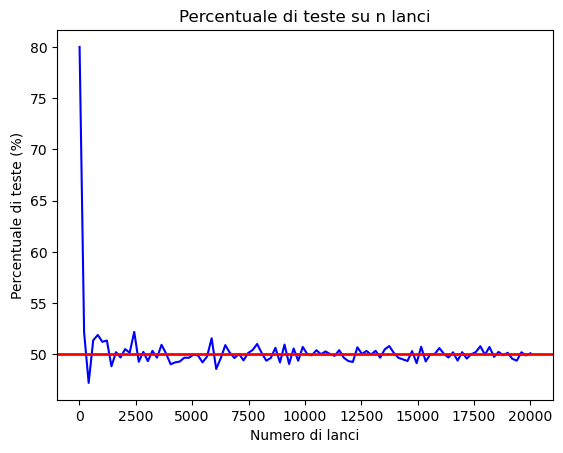

In [242]:
import numpy as np
import matplotlib.pyplot as plt
def nThrow(n):
    throws = np.random.choice([0, 1], size=n, p=[.5,.5])
    # print(f'Numero di teste su {n} lanci: {throws.sum()} -> {throws.sum()/n*100}%')
    return [throws.sum()/n*100, n]

testList = [nThrow(x) for x in np.linspace(start=10, stop=20000, num=100, dtype='int')]
freq = [x[0] for x in testList]
throws = [x[1] for x in testList]

# Creare il grafico a dispersione
plt.plot(throws, freq, color='blue')
plt.title("Percentuale di teste su n lanci")
plt.xlabel("Numero di lanci")
plt.ylabel("Percentuale di teste (%)")
plt.axhline(y=50, color='red', linestyle='-', linewidth=2)
plt.show()


## 2. Analisi del Dataset Titanic
- Quante righe e colonne ha il dataset?
- Controlla quanti valori mancanti ci sono per colonna
- Riempi i valori mancanti nella colonna 'Embarked' con il valore più frequente
- Rimuovi le righe dove il valore di 'Age' è mancante
- Controlla se ci sono righe duplicate
- Calcola l'età media dei passeggeri per ogni classe (`Pclass`), se ci sono valori mancanti di età riempili con il valore medio
- Visualizza la distribuzione dell'età per classe
- Visualizza la distribuzione dell'età per classe dividendo e mmostrando insieme i dati di uomini e donne

In [ ]:
# 📦 Caricamento del dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()
df=df.reset_index()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [328]:
print(f"Il dataframe è lungo {len(df)}")
missingValForColumn = len(df) - df.count()
missingValForColumn


Il dataframe è lungo 891


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [329]:
df.Embarked.fillna(df.Embarked.mode()[0], inplace=True)
df.dropna(subset=['Age'], inplace=True)

C:\Users\i5_10400f\AppData\Local\Temp\ipykernel_27152\1320338520.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Embarked.fillna(df.Embarked.mode()[0], inplace=True)


In [331]:
print(df.info())
df.drop_duplicates(inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     714 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     

In [339]:
meanForPclass = df.groupby("Pclass").Age.mean()
for x in [1, 2, 3]:
    df.loc[df["Pclass"] == x, "Age"] = df.loc[df["Pclass"] == x, "Age"].fillna(meanForPclass[x])
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S


<Axes: xlabel='None', ylabel='Age'>

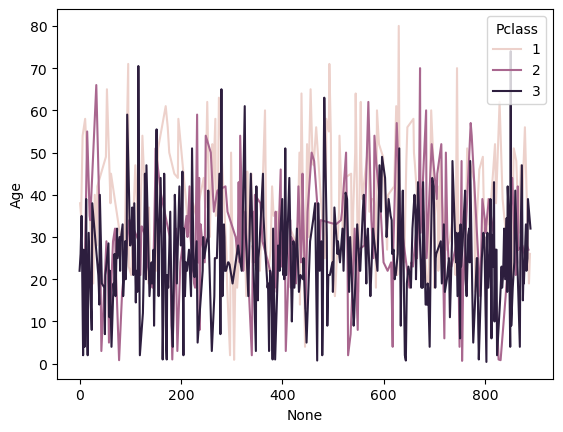

In [360]:
sns.lineplot(data=df, x=df.index, y="Age", hue="Pclass")

<Axes: xlabel='index', ylabel='Age'>

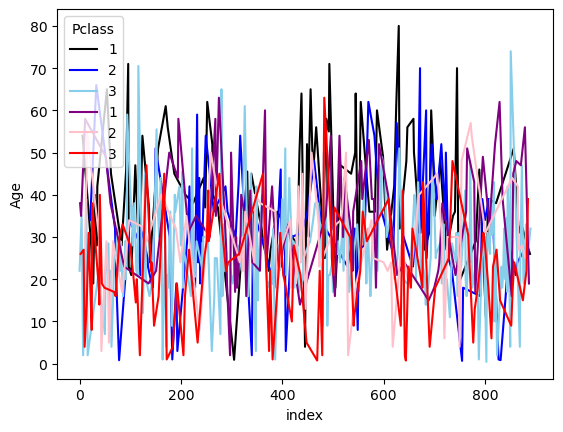

In [371]:

maleData = df.loc[df["Sex"]=="male", ["index", "Age", "Pclass"]]
femaleData = df.loc[df["Sex"]=="female", ["index","Age", "Pclass"]]

sns.lineplot(data=maleData, x="index", y="Age", hue="Pclass", palette=["black", "blue", "skyblue"])
sns.lineplot(data=femaleData, x="index", y="Age", hue="Pclass", palette=["purple", "pink", "red"])

## 3. Analisi del Dataset Iris

- Esplora la distribuzione delle specie (conta quanti campioni ci sono per specie)
- Calcola la lunghezza e la larghezza media dei petali per specie
- Visualizza le dimensioni dei petali per specie (scatterplot)
- Crea una nuova colonna per l'area del petalo e analizzala
- Grafico della distribuzione dell'area del petalo per specie (boxplot)

In [386]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
dfIris = pd.read_csv(url)
dfIris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [381]:
dfIris.groupby("species").count()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


In [384]:
dfIris.groupby("species")["petal_length"].mean(), dfIris.groupby("species")["petal_width"].mean()

(species
 setosa        1.462
 versicolor    4.260
 virginica     5.552
 Name: petal_length, dtype: float64,
 species
 setosa        0.246
 versicolor    1.326
 virginica     2.026
 Name: petal_width, dtype: float64)

<Axes: xlabel='petal_width', ylabel='petal_length'>

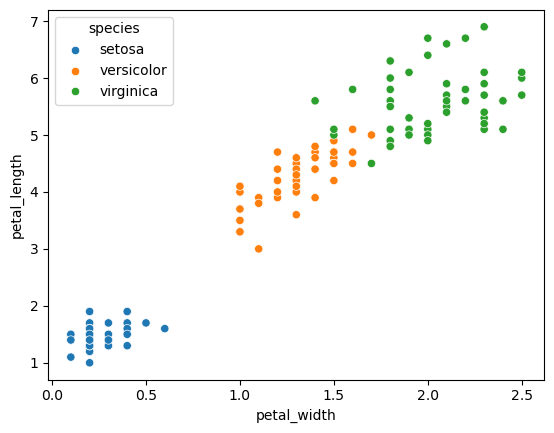

In [387]:
sns.scatterplot(data=dfIris, x="petal_width", y="petal_length", hue="species")

In [391]:
dfIris["petal_area"] = dfIris["petal_length"]*dfIris["petal_width"]
dfIris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species,petal_area
0,5.1,3.5,1.4,0.2,setosa,0.28
1,4.9,3.0,1.4,0.2,setosa,0.28
2,4.7,3.2,1.3,0.2,setosa,0.26
3,4.6,3.1,1.5,0.2,setosa,0.30
4,5.0,3.6,1.4,0.2,setosa,0.28
5,5.4,3.9,1.7,0.4,setosa,0.68
6,4.6,3.4,1.4,0.3,setosa,0.42
7,5.0,3.4,1.5,0.2,setosa,0.30
8,4.4,2.9,1.4,0.2,setosa,0.28
9,4.9,3.1,1.5,0.1,setosa,0.15


<Axes: xlabel='species', ylabel='petal_area'>

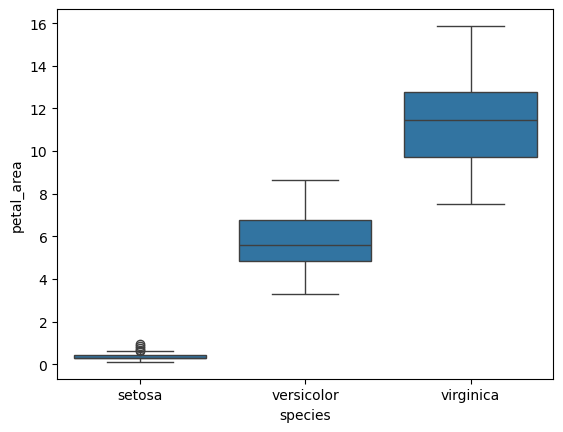

In [392]:
sns.boxplot(data=dfIris, x="species", y="petal_area")